In [35]:
'''
PROJECT_DESCRIPTION

'''

# Import Sequences
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping
from keras.layers import Dense , Flatten
from keras.models import Sequential
from keras.utils import to_categorical

# CSV variable for CSV file
CSV = '/content/diabetes_dataset.csv'



In [36]:
# Creating dataframe of CSV data
diabetesData = pd.read_csv(CSV)

# Displaying the dataframe
diabetesData

#print(diabetesData.smoking_history.unique().tolist())

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [37]:
# Data cleaning
# Replacing all Female with 1
diabetesData['gender'] = diabetesData['gender'].replace('Female', 1)

# Replacing all Males with 2
diabetesData['gender'] = diabetesData['gender'].replace('Male', 2)

# Replacing all Others with 3
diabetesData['gender'] = diabetesData['gender'].replace('Other', 3)

#Dropping the smoking habit column for ease of data
#diabetesData = diabetesData.drop('smoking_history',axis = 1)

# Replacing smoking_history values with 0-5
diabetesData['smoking_history'] = diabetesData['smoking_history'].replace('No Info', 0)

diabetesData['smoking_history'] = diabetesData['smoking_history'].replace('never', 1)

diabetesData['smoking_history'] = diabetesData['smoking_history'].replace('ever', 2)

diabetesData['smoking_history'] = diabetesData['smoking_history'].replace('former', 3)

diabetesData['smoking_history'] = diabetesData['smoking_history'].replace('not current', 4)

diabetesData['smoking_history'] = diabetesData['smoking_history'].replace('current', 5)

diabetesData

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,1,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,2,28.0,0,0,1,27.32,5.7,158,0
3,1,36.0,0,0,5,23.45,5.0,155,0
4,2,76.0,1,1,5,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,0,27.32,6.2,90,0
99996,1,2.0,0,0,0,17.37,6.5,100,0
99997,2,66.0,0,0,3,27.83,5.7,155,0
99998,1,24.0,0,0,1,35.42,4.0,100,0


In [38]:
# Drop the last 50 rows and use them as Test datasets
testSegment = 1000
testSet = diabetesData.tail(testSegment)
test_X = testSet.drop(columns=['diabetes'])
test_y = testSet[['diabetes']]

diabetesData = diabetesData.head(-testSegment)

# Creating the Output and Input sets from dataframe
# Creating training X and y sets
train_X = diabetesData.drop(columns=['diabetes'])
train_y = diabetesData[['diabetes']]

# Display both the dataframes
print(train_X)
print(test_X)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           1  80.0             0              1                1  25.19   
1           1  54.0             0              0                0  27.32   
2           2  28.0             0              0                1  27.32   
3           1  36.0             0              0                5  23.45   
4           2  76.0             1              1                5  20.14   
...       ...   ...           ...            ...              ...    ...   
98995       2  68.0             0              0                3  28.20   
98996       1  62.0             0              0                1  24.23   
98997       1  24.0             0              0                4  26.29   
98998       1  21.0             0              0                1  19.10   
98999       2  68.0             1              0                1  32.31   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1  

In [39]:
# Perform one hot encoding of train_y by using previously imported to_categorical() from keras

train_y = to_categorical(train_y.diabetes)

# View modified train_y set
train_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [40]:
# Design the simple classifier model

diabetesModel = Sequential()
diabetesModel.add(Dense(8, activation = 'relu', input_shape = (train_X.shape[1],)))
diabetesModel.add(Dense(16, activation = 'relu'))
diabetesModel.add(Dense(24, activation = 'relu'))
diabetesModel.add(Dense(16, activation = 'relu'))
diabetesModel.add(Dense(2 , activation = 'sigmoid'))
# Print the model layer summary
print(diabetesModel.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 8)                 72        
                                                                 
 dense_21 (Dense)            (None, 16)                144       
                                                                 
 dense_22 (Dense)            (None, 24)                408       
                                                                 
 dense_23 (Dense)            (None, 16)                400       
                                                                 
 dense_24 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1,058
Trainable params: 1,058
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
# Compile the model
diabetesModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping monitor
early_stopping_monitor = EarlyStopping(patience = 10)
#train_y = np.asarray(train_y).astype('float32').reshape((-1,1))

In [42]:

# Training the model with a 90-10 train-test split
history = diabetesModel.fit(train_X, train_y, validation_split=0.2, epochs=100, batch_size = 10 ,callbacks=[early_stopping_monitor] ) #,

Epoch 1/100
7920/7920 [==============================] - 26s 3ms/step - loss: 0.2305 - accuracy: 0.9306 - val_loss: 0.1364 - val_accuracy: 0.9514
Epoch 2/100
7920/7920 [==============================] - 25s 3ms/step - loss: 0.1367 - accuracy: 0.9517 - val_loss: 0.1211 - val_accuracy: 0.9569
Epoch 3/100
7920/7920 [==============================] - 27s 3ms/step - loss: 0.1237 - accuracy: 0.9564 - val_loss: 0.1072 - val_accuracy: 0.9645
Epoch 4/100
7920/7920 [==============================] - 31s 4ms/step - loss: 0.1160 - accuracy: 0.9593 - val_loss: 0.1173 - val_accuracy: 0.9602
Epoch 5/100
7920/7920 [==============================] - 24s 3ms/step - loss: 0.1124 - accuracy: 0.9607 - val_loss: 0.1106 - val_accuracy: 0.9603
Epoch 6/100
7920/7920 [==============================] - 19s 2ms/step - loss: 0.1106 - accuracy: 0.9608 - val_loss: 0.1411 - val_accuracy: 0.9460
Epoch 7/100
7920/7920 [==============================] - 18s 2ms/step - loss: 0.1073 - accuracy: 0.9622 - val_loss: 0.1144 -

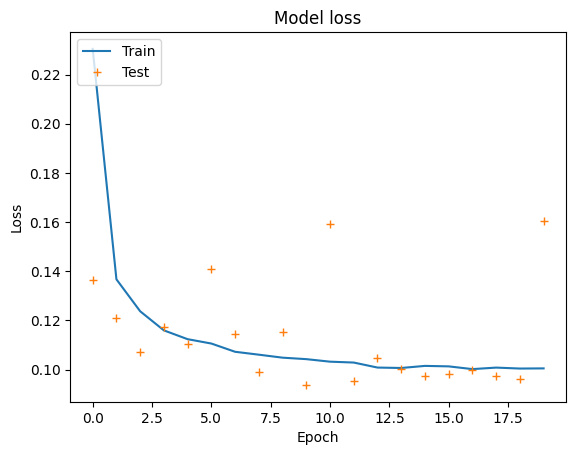

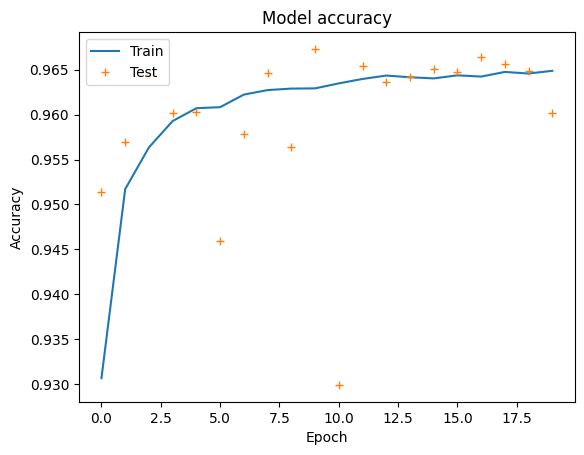

In [43]:
# Plot the accuracy data
# Losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'+')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#
print() # line break

#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'+')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [44]:
_ , accuracy = diabetesModel.evaluate(train_X, train_y)
print("Accuracy: %2f" % (accuracy*100))

3094/3094 [==============================] - 7s 2ms/step - loss: 0.1627 - accuracy: 0.9591
Accuracy: 95.914143


In [45]:
test_y = to_categorical(test_y.diabetes)

In [46]:
# evaluate model accuracy
_ , accuracy = diabetesModel.evaluate(test_X, test_y)
print("Accuracy: %2f" % (accuracy*100))
test_predictions = diabetesModel.predict(test_X)
test_predictions

32/32 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.9690
Accuracy: 96.899998
32/32 [==============================] - 0s 1ms/step


array([[9.58397448e-01, 1.53155215e-02],
       [9.95120823e-01, 5.79709740e-06],
       [9.79269683e-01, 6.51096052e-04],
       ...,
       [9.31300819e-01, 1.01996204e-02],
       [9.97349739e-01, 7.92648734e-06],
       [9.81348455e-01, 1.26748229e-03]], dtype=float32)